In [1]:
import numpy as np
import config
import matplotlib
import matplotlib.pyplot as plt

config.conf_matplolib()
# from spharm import Spharmt, getspecindx
from spectral.spherical.transforms import Yslm_vec, SHExpand
from spectral.spherical.grids import GLGrid

# from waveformtools.grids import GLGrid
import h5py
from waveformtools.diagnostics import method_info

# np.show_config()

/home/vaishakp/Projects/Codes/spectral/spectral
/home/vaishakp/Projects/Codes/waveformtools/waveformtools
No module named 'pycbc'


In [2]:
import scipy

# scipy.show_config()

In [3]:
%%bash
module list

ERROR: Loaded environment state is inconsistent
  LOADEDMODULES=
  _LMFILES_=/usr/share/modules/modulefiles/use.own /home/vaishakp/privatemodules/cuda/12.6


CalledProcessError: Command 'b'module list\n'' returned non-zero exit status 1.

In [3]:
from config.verbosity import levels

vl = levels()
vl.set_print_verbosity(1)

print verbosity has been set to 1 at /home/vaishakp/Projects/Codes/config/config/__init__.py


In [4]:
ell_max = 14

gl_info = GLGrid(L=ell_max)
theta_grid, phi_grid = gl_info.meshgrid

In [22]:
from spectral.spherical.swsh import Yslm

func = np.sin(theta_grid)
# func = np.sin(theta_grid)*np.cos(phi_grid)**3
# func = np.ones(gl_info.shape)
# func = 2.4*Yslm_vec(ell=6, emm=0, spin_weight=0, theta_grid=theta_grid, phi_grid=phi_grid) -4.5 * Yslm_vec(ell=13, emm=0, spin_weight=0, theta_grid=theta_grid, phi_grid=phi_grid)
# func = 2.4*Yslm_vec(ell=0, emm=0, spin_weight=0, theta_grid=theta_grid, phi_grid=phi_grid)
# func = np.cos(phi_grid)**4 * np.sin(theta_grid)
# func = np.load("/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/qlmtools/dev/nbs/matrix_KT_phi.npy")[0,0].real
# func = np.load("/mnt/sonic_icts/Projects/Codes/custom_libraries/qlmtools/dev/nbs/matrix_KT_phi.npy")[0,0].real

In [33]:
func.shape

(15, 30)

In [38]:
func.imag

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

## Testing waveformtools expansion
1. waveformtools vectorized expansion
    1. With residue calc
    1. Without residue calc

In [6]:
minfo = method_info(
    ell_max=ell_max,
    int_method="GL",
    diff_method="SH",
    swsh_routine="waveformtools",
)
minfo_slow = method_info(
    ell_max=ell_max,
    int_method="GL",
    diff_method="SH",
    swsh_routine="waveformtools_slow",
)
minfo_spack = method_info(
    ell_max=ell_max,
    int_method="GL",
    diff_method="SH",
    swsh_routine="spherepack",
)
minfo_sp = method_info(
    ell_max=ell_max,
    int_method="GL",
    diff_method="SH",
    swsh_routine="spherical",
)

In [11]:
help(SHExpand)

Help on function SHExpand in module spectral.spherical.transforms:

SHExpand(func, info, method_info, error_info=False, auto_ell_max=False, res_tol_percent=3, reg=False, reg_order=1, label=None)
    Expand a given function in spin weight 0 spherical harmonics
    upto an optimal :math:`\ell \leq \ell_{max}`.

    Parameters
    ----------
    func : ndarray
           The function to be expanded.
    info : Grid
           An instance of the Spherical grid class
           that stores the details of the structure
           of a grid on a topological sphere.
    method_info : MethodInfo
                  An instance of the method info
                  class that contains informations
                  about the numerical methods
                  to be used during the following
                  operations.
    error_info : bool
               Whether or not to compute and return
               the error measures related to the
               SH representation.

    Returns
    ------

## Without caching, conda

Time stat err  1.5981713008880616 0.08455542693288153

Time stat no err  0.8094721794128418 0.06192949675373192

## Without caching, opt

Time stat err  1.409931287765503 0.10512480445225708


Time stat no err  0.7261994361877442 0.06773736996504073

In [14]:
(1.5981713008880616 - 1.409931287765503) / (1.5981713008880616)

0.11778462860518053

In [15]:
(0.8094721794128418 - 0.7261994361877442) / (0.8094721794128418)

0.10287289093184185

## With caching, conda

Time stat err  0.7879845809936523 0.21783936744540372

Time stat no err  0.023445510864257814 0.0003406548353136277

## With caching, opt

Time stat err  0.6322350597381592 0.1530482935634428

Time stat no err  0.020553946495056152 0.00032997021526776836

In [16]:
(0.7879845809936523 - 0.6322350597381592) / 0.7879845809936523

0.19765554429896615

In [17]:
(0.023445510864257814 - 0.020553946495056152) / 0.023445510864257814

0.1233312588470738

In [12]:
%%timeit
wfmodes = SHExpand(func, gl_info, minfo, error_info=True)

10.09% Residue warning for None! 
Error report for None: 
	 {'RMS': 0.0014347666476189852, 'dAmin': (-0.005028752389569317+3.8300760425514635e-21j), 'dAmax': (0.005312743601980077+7.72886116708866e-21j)}
10.09% Residue warning for None! 
Error report for None: 
	 {'RMS': 0.0014347666476189852, 'dAmin': (-0.005028752389569317+3.8300760425514635e-21j), 'dAmax': (0.005312743601980077+7.72886116708866e-21j)}
10.09% Residue warning for None! 
Error report for None: 
	 {'RMS': 0.0014347666476189852, 'dAmin': (-0.005028752389569317+3.8300760425514635e-21j), 'dAmax': (0.005312743601980077+7.72886116708866e-21j)}
10.09% Residue warning for None! 
Error report for None: 
	 {'RMS': 0.0014347666476189852, 'dAmin': (-0.005028752389569317+3.8300760425514635e-21j), 'dAmax': (0.005312743601980077+7.72886116708866e-21j)}
10.09% Residue warning for None! 
Error report for None: 
	 {'RMS': 0.0014347666476189852, 'dAmin': (-0.005028752389569317+3.8300760425514635e-21j), 'dAmax': (0.005312743601980077+7.72

In [15]:
%%timeit
wfmodes = SHExpand(func, gl_info, minfo, err_info=True)

10.09% Residue warning! 
10.09% Residue warning! 
10.09% Residue warning! 
10.09% Residue warning! 
10.09% Residue warning! 
10.09% Residue warning! 
10.09% Residue warning! 
10.09% Residue warning! 
1.35 s ± 21.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
# import spectral.spherical.Yslm_mp
from spectral.spherical.Yslm_mp import Yslm_mp

# from spectral.spherical.Yslm_mp import _Yslm_mp_cache

In [18]:
Yslm_mp._Yslm_mp_cache.update({"a": 1})

In [16]:
i1 = Yslm_mp(ell_max=14, grid_info=gl_info, cache=True)

In [17]:
i1._Yslm_mp_cache

{}

In [18]:
i1.run()

False {}
Updating cache
{0: {14: <waveformtools.single_mode.SingleMode object at 0x7f1bb70a4310>}}


In [15]:
Yslm_mp._Yslm_mp_cache

{}

In [30]:
i1._Yslm_mp_cache

AttributeError: 'Yslm_mp' object has no attribute '_Yslm_mp_cache'

In [23]:
# %%timeit
wfmodes = SHExpand(func, gl_info, minfo, error_info=True)

In [24]:
func_r = wfmodes.contract(ell_max=14)

In [25]:
from spectral.spherical.transforms import SHContractWftoolsVec


func_r_vec = SHContractWftoolsVec(wfmodes)

In [8]:
from waveformtools.transforms import SHExpand as SHExpand2

wfmodes2 = SHExpand2(func, gl_info, minfo)

In [13]:
from spectral.spherical.transforms import SHContract
from waveformtools.transforms import SHContract as SHContract0

func3 = SHContract(wfmodes, wfmodes.Grid, ell_max=14, method_info=minfo)

In [14]:
func4 = SHContract0(wfmodes, wfmodes.Grid, ell_max=14)

In [46]:
minfo.__dict__

{'int_method': 'GL',
 'diff_method': 'SH',
 'ell_max': 14,
 'eval_ell_max': 8,
 'reg': True,
 'degree': 8,
 'swsh_routine': 'waveformtools',
 'atol': 0.0001,
 'rtol': 0.01,
 'ode_solver': 'solve_ivp',
 'vectorized': True,
 'ivp_method': 'RK45',
 'error_info': False}

In [26]:
wfmodes.non_zero_modes()

[[0, [0]],
 [2, [0]],
 [4, [0]],
 [6, [0]],
 [8, [0]],
 [10, [0]],
 [12, [0]],
 [14, [0]]]

In [69]:
wfmodes2.non_zero_modes()

[[1, [-1, 1]],
 [3, [-3, 3]],
 [5, [-3, 3]],
 [7, [-3, 3]],
 [9, [-3, 3]],
 [11, [-3, 3]],
 [13, [-3, 3]]]

In [11]:
wfmodes.mode(0, 0)

(2.399999999999999729+0j)

In [58]:
3.544907701811032**2 / 

12.566370614359174

In [12]:
wfmodes.mode(11, 3), wfmodes2.mode(11, 3)

((-0.011561786241114523-1.4929485035063378e-15j),
 (-0.011561786241114513-1.4933587903648976e-15j))

In [16]:
func2 = wfmodes.contract()

In [29]:
from waveformtools.waveforms import construct_mode_list

In [30]:
ml = construct_mode_list(ell_max=14, spin_weight=0)

In [31]:
ml

[[0, [0]],
 [1, [-1, 0, 1]],
 [2, [-2, -1, 0, 1, 2]],
 [3, [-3, -2, -1, 0, 1, 2, 3]],
 [4, [-4, -3, -2, -1, 0, 1, 2, 3, 4]],
 [5, [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]],
 [6, [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]],
 [7, [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]],
 [8, [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]],
 [9, [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
 [10,
  [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]],
 [11,
  [-11,
   -10,
   -9,
   -8,
   -7,
   -6,
   -5,
   -4,
   -3,
   -2,
   -1,
   0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11]],
 [12,
  [-12,
   -11,
   -10,
   -9,
   -8,
   -7,
   -6,
   -5,
   -4,
   -3,
   -2,
   -1,
   0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12]],
 [13,
  [-13,
   -12,
   -11,
   -10,
   -9,
   -8,
   -7,
   -6,
   -5,
   -4,
   -3,
   -2,
   -1,
   0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   

In [27]:
wfmodes.modes_list

[[0, [0]],
 [1, [-1, 0, 1]],
 [2, [-2, -1, 0, 1, 2]],
 [3, [-3, -2, -1, 0, 1, 2, 3]],
 [4, [-4, -3, -2, -1, 0, 1, 2, 3, 4]],
 [5, [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]],
 [6, [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]],
 [7, [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]],
 [8, [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]],
 [9, [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
 [10,
  [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]],
 [11,
  [-11,
   -10,
   -9,
   -8,
   -7,
   -6,
   -5,
   -4,
   -3,
   -2,
   -1,
   0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11]],
 [12,
  [-12,
   -11,
   -10,
   -9,
   -8,
   -7,
   -6,
   -5,
   -4,
   -3,
   -2,
   -1,
   0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12]],
 [13,
  [-13,
   -12,
   -11,
   -10,
   -9,
   -8,
   -7,
   -6,
   -5,
   -4,
   -3,
   -2,
   -1,
   0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   

In [76]:
np.testing.assert_array_almost_equal(
    wfmodes._modes_data, wfmodes2._modes_data, 15
)

AssertionError: 
Arrays are not almost equal to 15 decimals

Mismatched elements: 62 / 225 (27.6%)
Max absolute difference: 2.4
Max relative difference: 1.06698525e+16
 x: array([ 2.400000000000000e+00+0.000000000000000e+00j,
       -2.130931529507412e-16+2.677691656558767e-19j,
        1.943589742290389e-16+0.000000000000000e+00j,...
 y: array([-2.249328182579596e-16+0.000000000000000e+00j,
        1.085401881837401e+00+3.707187053299461e-17j,
        3.413217666711735e-19+0.000000000000000e+00j,...

In [30]:
np.testing.assert_array_almost_equal(func, func_r, 12)

In [52]:
(0.15450173 / 1.29472536e-01)

1.1933166273965623

In [46]:
func / func2

array([[ 1.19331662e+00+1.00927408e-28j,  1.24253755e+00-3.96972394e-18j,
         1.40379886e+00+1.21419573e-17j,  1.72541987e+00-2.52896319e-17j,
         2.32204971e+00-5.91831320e-17j,  3.48432742e+00+7.29483429e-17j,
         6.22786023e+00+8.04867681e-17j,  1.95302288e+01-2.75177726e-15j,
        -1.95302288e+01-2.30565066e-15j, -6.22786023e+00-1.97955795e-16j,
        -3.48432742e+00-7.32145777e-17j, -2.32204971e+00-1.15860393e-16j,
        -1.72541987e+00+4.29984101e-17j, -1.40379886e+00+1.49828877e-17j,
        -1.24253755e+00+4.37405941e-18j, -1.19331662e+00+9.61355031e-29j,
        -1.24253755e+00-1.17621815e-18j, -1.40379886e+00+8.97660648e-18j,
        -1.72541987e+00+3.96228862e-17j, -2.32204971e+00+7.80146471e-17j,
        -3.48432742e+00+6.65587075e-18j, -6.22786023e+00-6.36395442e-17j,
        -1.95302288e+01+2.61385009e-15j,  1.95302288e+01+2.09306011e-15j,
         6.22786023e+00+1.84545034e-16j,  3.48432742e+00-4.60586253e-17j,
         2.32204971e+00+1.05627803e-16

In [12]:
func

array([[0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j,
        0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j,
        0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j,
        0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j,
        0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j,
        0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j,
        0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j,
        0.6770275+0.j, 0.6770275+0.j],
       [0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j,
        0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j,
        0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j,
        0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j,
        0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j,
        0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j,
        0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j, 0.6770275+0.j,
        0

In [13]:
func_r

array([[0.6770275+5.04878205e-31j, 0.6770275+3.90415801e-31j,
        0.6770275+4.48128410e-31j, 0.6770275+7.77630587e-31j,
        0.6770275-7.75041172e-31j, 0.6770275+4.05211513e-31j,
        0.6770275+5.94748008e-31j, 0.6770275+5.54599990e-31j,
        0.6770275-1.12587594e-30j, 0.6770275-4.30581329e-31j,
        0.6770275+1.59168879e-30j, 0.6770275-1.67263069e-30j,
        0.6770275-2.47469401e-30j, 0.6770275+5.66955104e-31j,
        0.6770275+4.45270142e-31j, 0.6770275-5.14749167e-31j,
        0.6770275-1.59838027e-30j, 0.6770275-4.50281415e-31j,
        0.6770275-1.59724091e-31j, 0.6770275-5.07345279e-31j,
        0.6770275-2.18171689e-31j, 0.6770275-5.67288067e-32j,
        0.6770275+1.23282660e-31j, 0.6770275+1.24488528e-30j,
        0.6770275-1.02937636e-30j, 0.6770275-2.10082280e-30j,
        0.6770275+4.16669157e-31j, 0.6770275+1.69476287e-30j,
        0.6770275-2.20586265e-31j, 0.6770275-4.20839552e-31j],
       [0.6770275+7.05446797e-31j, 0.6770275+5.19579152e-31j,
       

In [14]:
func_r_vec

array([[0.6770275-2.05553565e-34j, 0.6770275-1.19883727e-34j,
        0.6770275-7.33243362e-35j, 0.6770275+1.00533640e-35j,
        0.6770275+5.12212823e-34j, 0.6770275-1.37912464e-34j,
        0.6770275-4.39732079e-34j, 0.6770275-2.65861488e-34j,
        0.6770275-2.01663750e-34j, 0.6770275+5.91238570e-35j,
        0.6770275-2.70487077e-35j, 0.6770275-7.92966213e-34j,
        0.6770275-4.90137169e-34j, 0.6770275+4.74592274e-34j,
        0.6770275-3.43071828e-34j, 0.6770275+1.86191951e-34j,
        0.6770275-2.02037198e-34j, 0.6770275+2.41011599e-34j,
        0.6770275-1.48481922e-34j, 0.6770275-1.05502062e-34j,
        0.6770275+1.02110569e-34j, 0.6770275+8.84246935e-35j,
        0.6770275+5.55155215e-34j, 0.6770275-1.58730270e-34j,
        0.6770275+4.30920376e-34j, 0.6770275-3.86547758e-34j,
        0.6770275-1.16038055e-34j, 0.6770275+1.52986489e-34j,
        0.6770275+1.87402046e-34j, 0.6770275-4.77611929e-34j],
       [0.6770275-6.42381713e-34j, 0.6770275-3.44512924e-34j,
       

In [21]:
func4

array([[ 1.29472536e-01-9.84766710e-30j,  1.24343711e-01+3.07254444e-19j,
         1.10059734e-01-8.75452785e-19j,  8.95444244e-02+1.20703546e-18j,
         6.65367880e-02+1.86096748e-18j,  4.43419089e-02-9.28348111e-19j,
         2.48081562e-02-1.78984343e-19j,  7.91090218e-03+8.62893142e-19j,
        -7.91090218e-03+8.80008532e-19j, -2.48081562e-02+5.65796163e-19j,
        -4.43419089e-02+9.31736243e-19j, -6.65367880e-02+3.45859486e-18j,
        -8.95444244e-02-2.13482009e-18j, -1.10059734e-01-1.25083280e-18j,
        -1.24343711e-01-4.58272262e-19j, -1.29472536e-01-9.61174690e-30j,
        -1.24343711e-01+3.08944944e-19j, -1.10059734e-01-6.35601184e-19j,
        -8.95444244e-02-1.78768615e-18j, -6.65367880e-02-2.20743571e-18j,
        -4.43419089e-02-8.47032953e-20j, -2.48081562e-02+2.82656753e-19j,
        -7.91090218e-03-8.05935255e-19j,  7.91090218e-03-1.04148188e-18j,
         2.48081562e-02-5.40878164e-19j,  4.43419089e-02+5.86146800e-19j,
         6.65367880e-02-2.97056860e-18

In [20]:
_Yslm_mp_cache

{}

In [20]:
wfmodes_slow = SHExpand(func, gl_info, minfo_slow, error_info=True)

In [31]:
spmodes = SHExpand(func, gl_info, minfo_spack, err_info=True)

Using SpherePack routine...
Total num modes 120.0
N fully un occupied levels 14
N unocc sublevel 14
N unocc modes 119.0
Total num modes 120.0


N fully un occupied levels 14
N unocc sublevel 13
N unocc modes 118.0
Total num modes 120.0
N fully un occupied levels 13
N unocc sublevel 13
N unocc modes 104.0
Total num modes 120.0
N fully un occupied levels 14
N unocc sublevel 12
N unocc modes 117.0
Total num modes 120.0
N fully un occupied levels 13
N unocc sublevel 12
N unocc modes 103.0
Total num modes 120.0
N fully un occupied levels 12
N unocc sublevel 12
N unocc modes 90.0
Total num modes 120.0
N fully un occupied levels 14
N unocc sublevel 11
N unocc modes 116.0
Total num modes 120.0
N fully un occupied levels 13
N unocc sublevel 11
N unocc modes 102.0
Total num modes 120.0
N fully un occupied levels 12
N unocc sublevel 11
N unocc modes 89.0
Total num modes 120.0
N fully un occupied levels 11
N unocc sublevel 11
N unocc modes 77.0
Total num modes 120.0
N fully un occupied levels 14
N unocc sublevel 10
N unocc modes 115.0
Total num modes 120.0
N fully un occupied levels 13
N unocc sublevel 10
N unocc modes 101.0
Total num mod

In [32]:
modes_spherical = SHExpand(func, gl_info, minfo_sp, err_info=True)

Created a modes array of mode axis shape (15, 30)
10.09% Residue warning! 


In [33]:
wfmodes.residuals

[0.014223766391502067,
 0.014222089245485868,
 0.00848139930333354,
 0.008246403650727662,
 0.008239553391466434,
 0.005876526443869684,
 0.005874486653905475,
 0.004486960872548328,
 0.004486315165402046,
 0.003497811332640215,
 0.0034975224563505132,
 0.0027151547450398445,
 0.002714998430622305,
 0.00205045281731648,
 0.002050361986178857,
 0.001434766647618993]

In [34]:
wfmodes_slow.residuals

[0.014223766391502067,
 0.014222089245485868,
 0.00848139930333354,
 0.008246403650727662,
 0.008239553391466432,
 0.005876526443869684,
 0.005874486653905475,
 0.004486960872548328,
 0.0044863151654020465,
 0.003497811332640215,
 0.0034975224563505137,
 0.002715154745039844,
 0.0027149984306223045,
 0.00205045281731648,
 0.002050361986178857,
 0.0014347666476189926]

In [35]:
spmodes.residuals

[0.014223766391502067,
 0.01422208924557774,
 0.008481399299252871,
 0.00824640368107513,
 0.008239553426221803,
 0.005876526264923262,
 0.005874486475331732,
 0.004486960722336023,
 0.00448631501509108,
 0.0034978112475619705,
 0.0034975223709893494,
 0.0027151547422448355,
 0.0027149984274019924,
 0.0020504528073488864,
 0.0020503619759560158,
 0.0014347665508654152]

In [36]:
modes_spherical.residuals

[0.014223766391502067,
 0.014222089245485868,
 0.00848139930333354,
 0.008246403650727664,
 0.008239553391466432,
 0.005876526443869684,
 0.005874486653905475,
 0.004486960872548327,
 0.004486315165402046,
 0.0034978113326402114,
 0.0034975224563505098,
 0.002715154745039827,
 0.0027149984306222875,
 0.0020504528173164744,
 0.0020503619861788522,
 0.0014347666476189583]

In [88]:
np.testing.assert_array_almost_equal(
    wfmodes._modes_data, wfmodes_slow._modes_data, 2, "MA"
)

AssertionError: 
Arrays are not almost equal to 2 decimals
MA
Mismatched elements: 1 / 225 (0.444%)
Max absolute difference: 1.
Max relative difference: 577.7101326
 x: array([-2.09e-21+0.00e+00j,  1.37e-19+1.87e-18j,  6.68e-18+0.00e+00j,
       -1.37e-19+1.87e-18j,  1.80e-19+6.96e-19j, -3.15e-17+1.08e-17j,
        2.77e-23+0.00e+00j,  3.15e-17+1.08e-17j,  1.80e-19-6.96e-19j,...
 y: array([-2.09e-21-0.00e+00j, -1.18e-20+3.71e-21j,  6.69e-18-0.00e+00j,
       -1.18e-20-3.71e-21j, -4.94e-24-3.19e-21j,  3.22e-17-1.10e-17j,
        3.38e-21-0.00e+00j,  3.22e-17+1.10e-17j, -4.94e-24+3.19e-21j,...

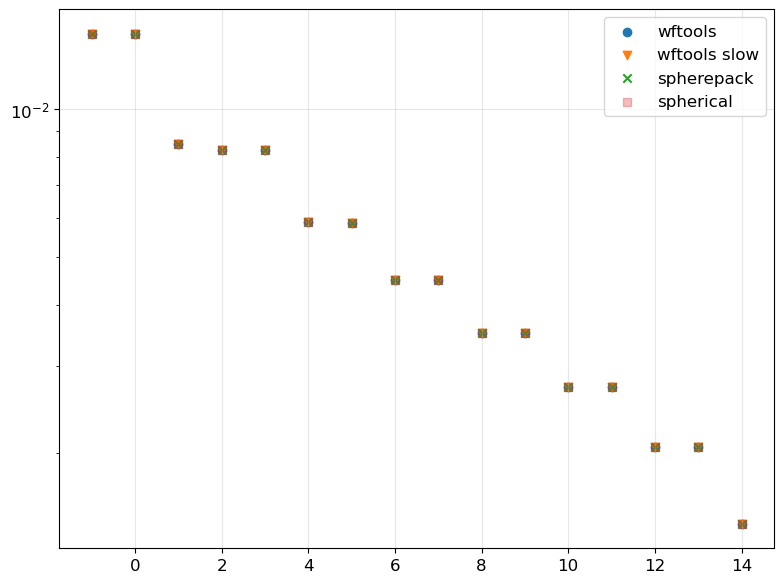

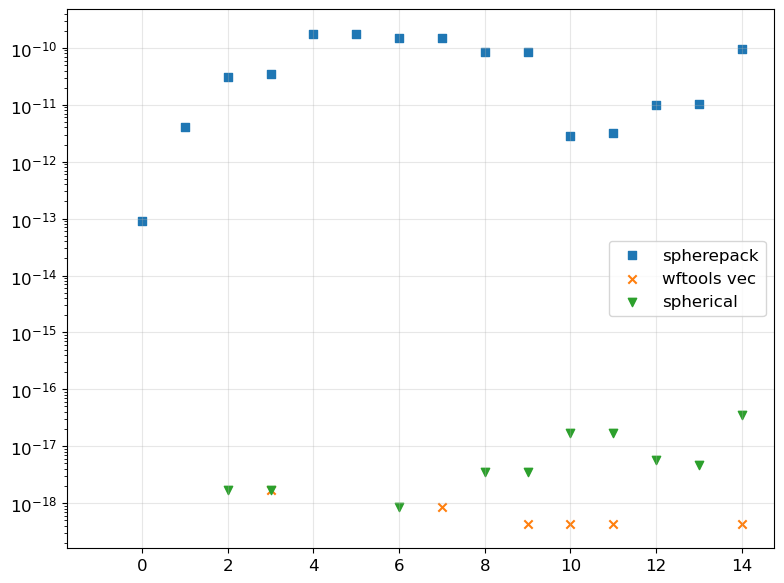

In [37]:
fig, ax = plt.subplots()
ax.set_yscale("log")

ax.scatter(wfmodes.residual_axis, wfmodes.residuals, label="wftools")
ax.scatter(
    wfmodes_slow.residual_axis,
    wfmodes_slow.residuals,
    label="wftools slow",
    marker="v",
)
ax.scatter(
    spmodes.residual_axis, spmodes.residuals, label="spherepack", marker="x"
)
ax.scatter(
    modes_spherical.residual_axis,
    modes_spherical.residuals,
    label="spherical",
    marker="s",
    alpha=0.3,
)
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.set_yscale("log")
ax.scatter(
    wfmodes.residual_axis,
    abs(np.array(wfmodes.residuals) - np.array(spmodes.residuals)),
    label="spherepack",
    marker="s",
)
ax.scatter(
    wfmodes.residual_axis,
    abs(np.array(wfmodes.residuals) - np.array(wfmodes_slow.residuals)),
    label="wftools vec",
    marker="x",
)
ax.scatter(
    wfmodes.residual_axis,
    abs(np.array(wfmodes.residuals) - np.array(modes_spherical.residuals)),
    label="spherical",
    marker="v",
)
# plt.scatter(spmodes.residual_axis, spmodes.residuals, label='spherepack', marker='x')
plt.legend()
plt.show()

In [44]:
ell = 3
emm = 1
wfmodes.mode(ell, emm), wfmodes_slow.mode(ell, emm), spmodes.mode(
    ell, emm
), modes_spherical.mode(ell, emm)

((0.0005222917541377897+0.00013465139243512954j),
 (0.0005222917541377865+0.00013465139243512962j),
 (0.0005222922227322968+0.00013465161022411547j),
 (0.0005222917541377874+0.00013465139243513198j))

In [25]:
np.testing.assert_array_almost_equal(
    wfmodes._modes_data, spmodes._modes_data, 1, "MA"
)

In [28]:
for ell in range(ell_max + 1):
    for emm in range(-ell, ell + 1):

        np.testing.assert_almost_equal(
            wfmodes.mode(ell, emm),
            spmodes.mode(ell, emm),
            8,
            f"l{ell} m {emm}",
        )

AssertionError: 
Arrays are not almost equal to 8 decimals l1 m -1
 ACTUAL: (-0.03064711432213326-0.010458835080748116j)
 DESIRED: (0.030647116888504484+0.010458835833054162j)

In [78]:
spmodes.mode(8, 0)

(-1.8220521293885986e-06+0j)

((3.825639992497958e-06+0.012425985740451635j),
 (3.825639992498356e-06-0.012425985740451636j),
 (3.825555325409369e-06-0.012425988484043964j))

In [ ]:
3.5449077018110318 / 2.5066284430248484

1.4142134673670463

In [ ]:
np.sqrt(2)

1.4142135623730951

In [ ]:
aaa = np.array([-2, -1, 0, 1, 2])

In [ ]:
aaa[aaa > 0]

array([1, 2])

In [18]:
wfmodes.evaluate_old(theta=np.pi / 2, phi=0, ell_max=wfmodes.ell_max)

(1.0000000000000527175+1.625003390576730251e-34j)

In [19]:
%%timeit
wfmodes.evaluate_old(theta=np.pi / 2, phi=0, ell_max=wfmodes.ell_max)

5.68 s ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
wfmodes.evaluate(theta=np.pi / 2, phi=0, ell_max=wfmodes.ell_max)

array(1.+9.61424228e-31j)

In [12]:
wfmodes.evaluate(theta=theta_grid, phi=phi_grid, ell_max=wfmodes.ell_max).shape

(15, 30)

In [16]:
%%timeit
wfmodes.evaluate(theta=np.pi / 2, phi=0, ell_max=wfmodes.ell_max)

1.07 s ± 20 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
m = 2.0

type(m)

float

In [16]:
if int(m) == m:
    print(1)

1


In [10]:
wfmodes.evaluate_sp(theta=np.pi / 2, phi=0, ell_max=wfmodes.ell_max)

(1.0000000000000526+0j)

In [85]:
from importlib import reload
import spectral

reload(spectral.spherical.swsh)

<module 'spectral.spherical.swsh' from '/home/vaishakprasad/Documents/Projects/Codes/custom_libraries/spectral/spectral/spherical/swsh.py'>

In [86]:
from spectral.spherical.swsh import create_Ylm_modes_array

In [87]:
sYlm = create_Ylm_modes_array(
    theta=np.pi / 2, phi=0.0, ell_max=2, spin_weight=-2
)

In [88]:
sYlm.mode(2, 2)

(0.15769578262625997-3.862432708645721e-17j)

In [89]:
Yslm(spin_weight=0, theta=np.pi / 2, phi=0, ell=2, emm=2)

(0.3862742020231896+0j)

In [37]:
from importlib import reload
import spectral

reload(spectral.spherical.Yslm_mp)

<module 'spectral.spherical.Yslm_mp' from '/home/vaishakprasad/Documents/Projects/Codes/custom_libraries/spectral/spectral/spherical/Yslm_mp.py'>

In [11]:
from spectral.spherical.Yslm_mp import Yslm_mp

In [12]:
theta_grid

array([[0.15512311, 0.15512311, 0.15512311, 0.15512311, 0.15512311,
        0.15512311, 0.15512311, 0.15512311, 0.15512311, 0.15512311,
        0.15512311, 0.15512311, 0.15512311, 0.15512311, 0.15512311,
        0.15512311, 0.15512311, 0.15512311, 0.15512311, 0.15512311,
        0.15512311, 0.15512311, 0.15512311, 0.15512311, 0.15512311,
        0.15512311, 0.15512311, 0.15512311, 0.15512311, 0.15512311],
       [0.35607183, 0.35607183, 0.35607183, 0.35607183, 0.35607183,
        0.35607183, 0.35607183, 0.35607183, 0.35607183, 0.35607183,
        0.35607183, 0.35607183, 0.35607183, 0.35607183, 0.35607183,
        0.35607183, 0.35607183, 0.35607183, 0.35607183, 0.35607183,
        0.35607183, 0.35607183, 0.35607183, 0.35607183, 0.35607183,
        0.35607183, 0.35607183, 0.35607183, 0.35607183, 0.35607183],
       [0.55820621, 0.55820621, 0.55820621, 0.55820621, 0.55820621,
        0.55820621, 0.55820621, 0.55820621, 0.55820621, 0.55820621,
        0.55820621, 0.55820621, 0.55820621, 0.

In [13]:
cYslm = Yslm_mp(ell_max=14, spin_weight=0, grid_info=gl_info)

In [14]:
cYslm.run()

In [15]:
cYslm.sYlm_modes.mode(2, 2)

array([[ 0.00922067+0.00000000e+00j,  0.0084235 +3.75038362e-03j,
         0.00616983+6.85229184e-03j,  0.00284934+8.76937655e-03j,
        -0.00096382+9.17015639e-03j, -0.00461033+7.98533288e-03j,
        -0.00745968+5.41977277e-03j, -0.00901917+1.91708471e-03j,
        -0.00901917-1.91708471e-03j, -0.00745968-5.41977277e-03j,
        -0.00461033-7.98533288e-03j, -0.00096382-9.17015639e-03j,
         0.00284934-8.76937655e-03j,  0.00616983-6.85229184e-03j,
         0.0084235 -3.75038362e-03j,  0.00922067-2.25841235e-18j,
         0.0084235 +3.75038362e-03j,  0.00616983+6.85229184e-03j,
         0.00284934+8.76937655e-03j, -0.00096382+9.17015639e-03j,
        -0.00461033+7.98533288e-03j, -0.00745968+5.41977277e-03j,
        -0.00901917+1.91708471e-03j, -0.00901917-1.91708471e-03j,
        -0.00745968-5.41977277e-03j, -0.00461033-7.98533288e-03j,
        -0.00096382-9.17015639e-03j,  0.00284934-8.76937655e-03j,
         0.00616983-6.85229184e-03j,  0.0084235 -3.75038362e-03j],
       [ 

In [16]:
%%timeit
cYslm.run()

643 ns ± 8.25 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [34]:
%%timeit
cYslm.run()

1.48 s ± 31.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
np.array(cYslm.sYlm_modes._modes_data).shape

(225, 15, 30)

In [14]:
%%timeit
cYslm.store_as_modes()

3.84 s ± 73.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
cYslm.result_list

[[0, array(0.28209479+0.j)],
 [1, array(0.34549415+0.j)],
 [2, array(5.42457759e-17+0.j)],
 [3, array(-0.34549415+0.j)],
 [4, array(0.3862742+0.j)],
 [5, array(1.71540205e-16+0.j)],
 [6, array(-0.31539157+0.j)],
 [7, array(-1.71540205e-16+0.j)],
 [8, array(0.3862742+0.j)]]

In [47]:
wfmodes.mode(1, 0)

(2.1236804377400126e-16+0j)

In [50]:
int(np.sqrt(5) - 1)

1

In [52]:
int(1.99)

1

In [54]:
int(np.sqrt(5))

2

In [51]:
5 - (4)

1

In [55]:
1 - 2

-1

In [21]:
%%timeit


def get_index(ell, emm):
    ind = 0
    for ell_ind in range(ell + 1):
        ind += 2 * ell_ind + 1

    return ind + emm - ell_ind - 1


# info = GLGrid(L=24)
# minfo = method_info(ell_max=24, int_method='GL')

ell_max = 24

# from waveformtools.transforms import Yslm_prec_grid

# theta_grid, phi_grid = info.meshgrid

theta = np.pi / 2
phi = 0
spin_weight = 0

import quaternionic, spherical

R = quaternionic.array.from_spherical_coordinates(theta, phi)
# ell_max = ell

wigner = spherical.Wigner(ell_max)

Y2 = wigner.sYlm(spin_weight, R)


Ylm_spherical = Y2.T[get_index(2, 0)].T

313 µs ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [18]:
Y2.shape

(625,)

In [1]:
import numpy as np

In [3]:
aa = np.zeros((10, *(2, 2)))

In [4]:
aa.shape

(10, 2, 2)

In [54]:
from qlmtools.integration import TwoDIntegral

In [55]:
func = np.sin(theta_grid)

In [56]:
cYslm

NameError: name 'sYlm' is not defined

In [60]:
Ym = np.array(cYslm.sYlm_modes._modes_data)

In [62]:
Ym.shape

(225, 15, 30)

In [63]:
integrand = Ym * func

In [70]:
integrand.shape

(225, 15, 30)

In [67]:
modes_vec = TwoDIntegral(integrand, gl_info, method="GL")

In [69]:
modes_vec.shape

()

In [74]:
np.tensordot(integrand, gl_info.weights_grid, axes=((-2, -1), (0, 1))).shape

(225,)

In [15]:
class trial:

    def __init__(self, a):
        self.a = a

    b = 0

In [22]:
tt = trial(1)
tt2 = trial(2)

In [23]:
tt.a

1

In [24]:
tt.b

0

In [19]:
tt.b = 3

In [1]:
import numpy as np
import numba as nb

In [6]:
nb.typeof([2.0, 3.4])

List(float64, True)

In [9]:
nb.typeof([[2, [1, 2, 3], [0, [1, 2]]]])

List(reflected list(int64)<iv=None>, True)

In [10]:
nb.typeof({"l0": {"m1": 4.2}})

ValueError: Cannot determine Numba type of <class 'dict'>

In [42]:
class foo:
    _a = 1

    def __init__(self, b):
        self.b = b

In [43]:
g1 = foo(2)

In [44]:
g1._a

1

In [45]:
g1.a

AttributeError: 'foo' object has no attribute 'a'